# <center> 👉 class_12_4 » _Deep Learning with CV - Emotion Recognition_ </center>

# Facial Emotion Recognition

Facial Emotion Recognition (FER) refers to the process of identifying and categorizing human emotions based on facial expressions.   
- By analyzing facial features and patterns, machines can make educated guesses about a person's emotional state.   
- This subfield of facial recognition is highly interdisciplinary, drawing on insights from computer vision, machine learning, and psychology.


In [1]:
import zipfile

path = './images/CV/fer_img.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./images/CV/Fer_Images/')
zip_object.close()

Sample FER dataset: 
In the Happy folder, there is an image of your face that represents 'happy'. 

(48, 48, 3) (48, 48, 3)


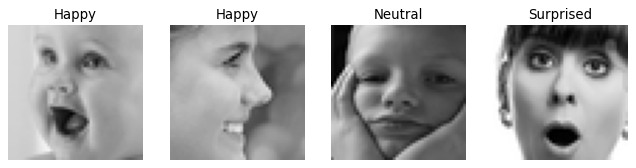

In [17]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)

img1 = tf.keras.preprocessing.image.load_img('./images/CV/Fer_Images/train/happy/im100.png')
img2 = tf.keras.preprocessing.image.load_img('./images/CV/Fer_Images/train/happy/im150.png')
img3 = tf.keras.preprocessing.image.load_img('./images/CV/Fer_Images/train/neutral/im100.png')
img4 = tf.keras.preprocessing.image.load_img('./images/CV/Fer_Images/train/surprised/im150.png')
print(np.array(img1).shape, np.array(img3).shape)

plt.subplot(141),plt.imshow(img1),plt.title('Happy'),plt.axis('off')
plt.subplot(142),plt.imshow(img2),plt.title('Happy'),plt.axis('off')
plt.subplot(143),plt.imshow(img3),plt.title('Neutral'),plt.axis('off')
plt.subplot(144),plt.imshow(img4),plt.title('Surprised'),plt.axis('off')
plt.show()

If you print out the image size, you can see that it is (48, 48, 3). 
- The last channel count is 3.   
- It's a black and white image, but it's channel 3.   
>- If the RGB values are all the same, the image will always be black and white.   
>- For example, if the color is (100, 100, 100), the red, green, and blue values will be in equal proportions, resulting in a black and white image.   
- Therefore, the RGB values of the FER images are all the same.  

이미지 크기를 출력해보면 (48, 48, 3)임을 알 수 있습니다. 마지막 채널수가 3입니다.   
흑백 이미지이지만 채널이 3이네요. RGB값이 모두 같으면 항상 흑백 이미지가 됩니다.   
- 예를 들어 색상이 (100, 100, 100)이면 빨간, 초록, 파란색 값이 같은 비율로 들어가 있어서 흑백 이미지가 됩니다.   
- 따라서 FER 이미지의 RGB 값은 모두 같습니다.

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = './images/CV/Fer_Images/train'
folder_names = os.listdir(path)
print(folder_names)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


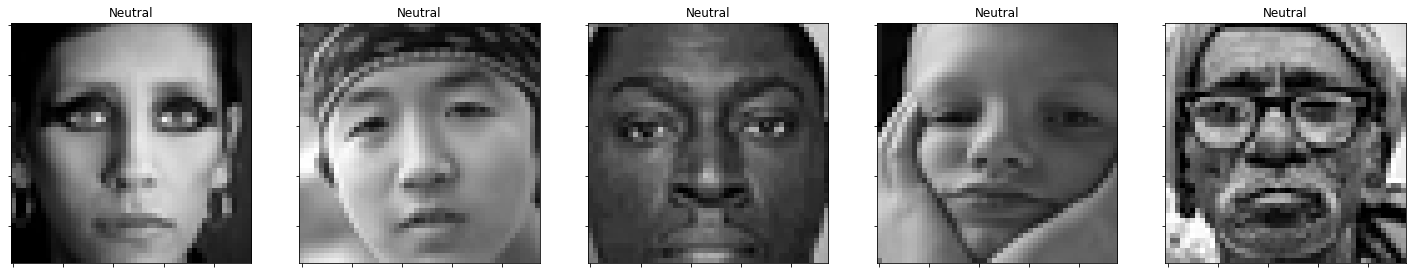

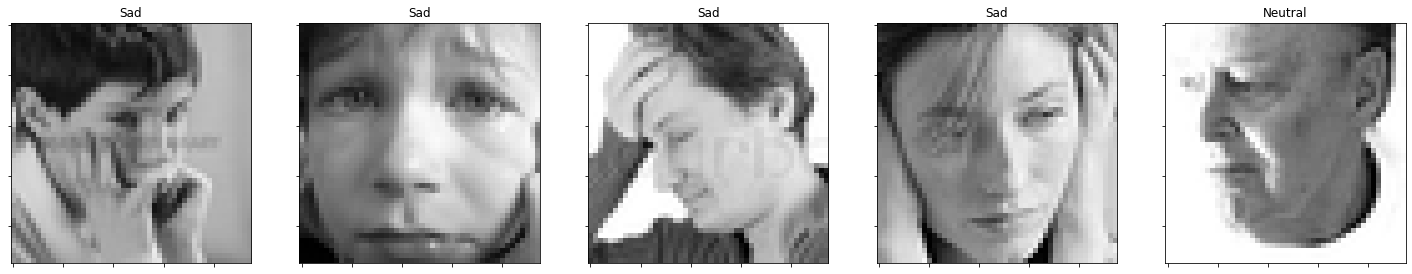

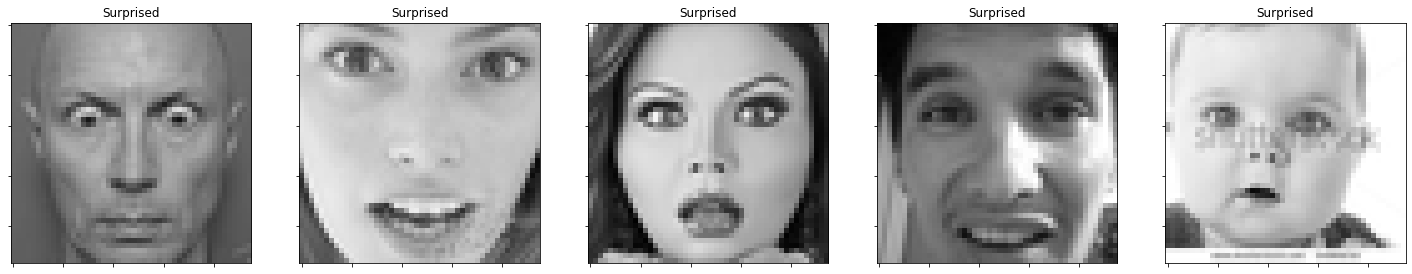

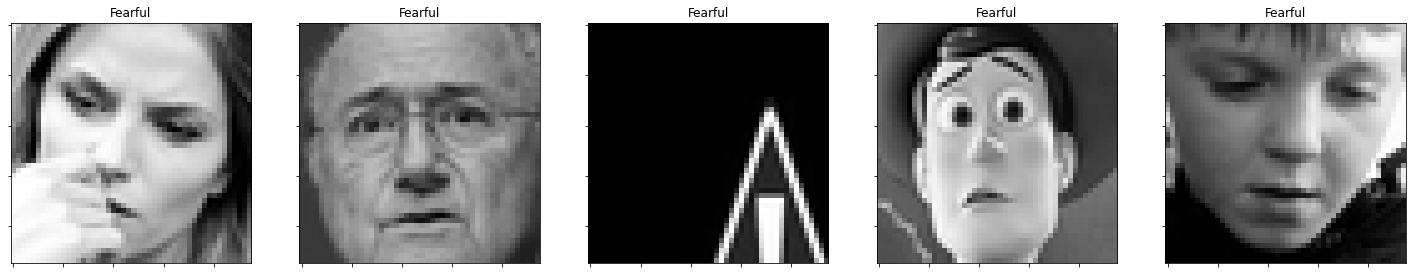

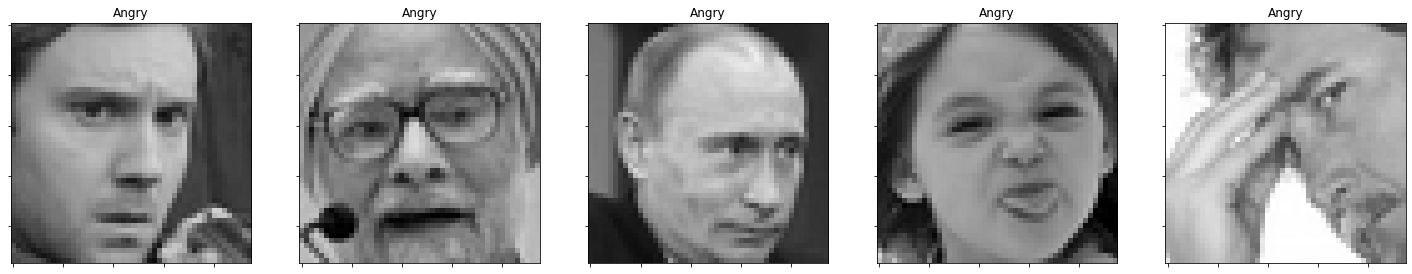

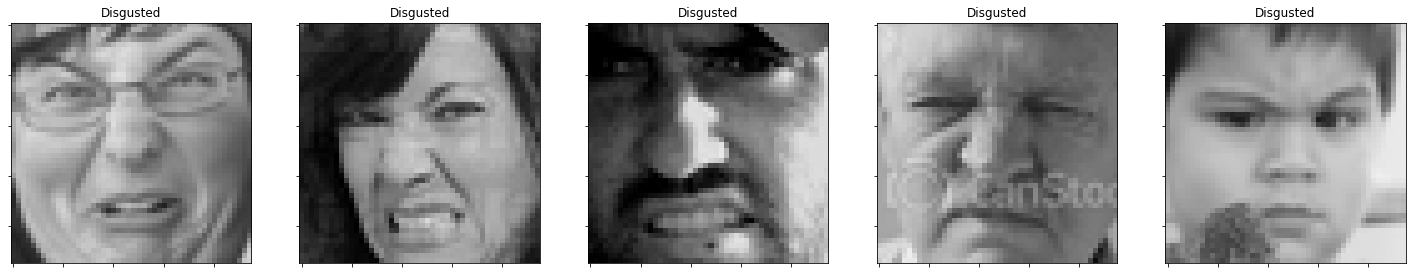

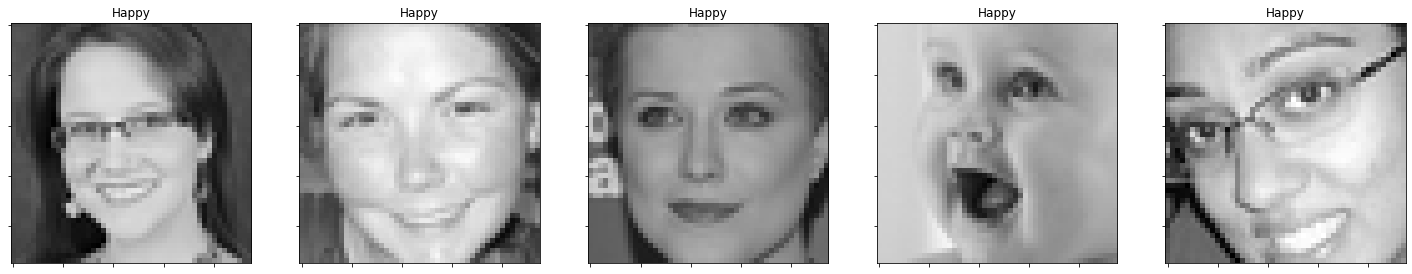

In [9]:
from matplotlib import pyplot as plt 

def plot_examples(folder_names, selected_folder, path):    
    
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    file_names = os.listdir(path + '/' + selected_folder)
    for i in range(5):
#         print(file_names[i])
        img = cv2.imread(path + '/' + selected_folder + '/' + file_names[i])
        axs[i].imshow(img)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        axs[i].set_title(selected_folder)
        
plot_examples(folder_names,'Neutral', path)
plot_examples(folder_names,'Sad', path)
plot_examples(folder_names,'Surprised', path)
plot_examples(folder_names,'Fearful', path)
plot_examples(folder_names,'Angry', path)
plot_examples(folder_names,'Disgusted', path)
plot_examples(folder_names,'Happy', path)

## 2. Preparing Dataset  

In [ ]:
# ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=10,  # Degree range for random rotations
                                     zoom_range=0.2,  # Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range]
                                     horizontal_flip=True,  # Randomly flip inputs horizontally
                                     rescale=1/255)  # Rescaling by 1/255 to normalize

Here, we used image rotation, zooming, horizontal symmetry, and normalization. 
- Image rotation, zoom, and horizontal symmetry are data augmentation functions.   
- Normalization is to match the pixel value of the data between 0~1.  
Once you've created an image data generator, you can create a dataset.   
- using flow_from_directory() method.  

여기서는 이미지 회전, 확대/축소, 수평 대칭, 정규화를 했습니다.   
이미지 회전, 확대/축소, 수평 대칭은 데이터 증강 기능이고,     
정규화는 데이터의 픽셀값을 0~1 사이로 맞추기 위함입니다.  
이미지 데이터 제너레이터를 만들었으면, 데이터셋을 만들 수 있습니다.   
flow_from_directory() 메서드를 실행하면 됩니다.

In [ ]:
train_dataset = train_generator.flow_from_directory(directory='/content/fer2013/train',
                                                    target_size=(48, 48),  # Tuple of integers (height, width), defaults to (256, 256)
                                                    class_mode='categorical',
                                                    batch_size=16,  # Size of the batches of data (default: 32)
                                                    shuffle=True,  # Whether to shuffle the data (default: True) If set to False, sorts the data in alphanumeric order
                                                    seed=10)

In [ ]:
train_dataset.classes

In [ ]:
array([0, 0, 0, ..., 6, 6, 6], dtype=int32) :   

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


In [ ]:
train_dataset.class_indices

In [ ]:
np.unique(train_dataset.classes, return_counts=True)

In [ ]:
The number of images each class has :
(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), 
   array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [ ]:
test_generator = ImageDataGenerator(rescale=1/255)
test_dataset = test_generator.flow_from_directory(directory='./images/CV/Fer_Images/test',
                                                  target_size=(48, 48),
                                                  class_mode='categorical',
                                                  batch_size=1,
                                                  shuffle=False,
                                                  seed=10)

## 3. CNN Model  

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

num_classes = 7
num_detectors = 32
width, height = 48, 48

network = Sequential()

network.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same', input_shape=(width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(filters=num_detectors, kernel_size=3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, 3, activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2, 2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2*2*num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2*num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))

C:\Users\Owner\miniconda3\envs\jeff_heaton_t81_park\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Owner\miniconda3\envs\jeff_heaton_t81_park\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Owner\miniconda3\envs\jeff_heaton_t81_park\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\U

In [2]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

## 4. Train

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 70
network.fit(train_dataset, epochs=epochs)

In [ ]:
Took around 1 hr w/ google colab GPU

  Epoch 1/70 1795/1795 [==============================] - 76s 33ms/step - loss: 1.8536 - accuracy: 0.2625
  Epoch 2/70 1795/1795 [==============================] - 59s 33ms/step - loss: 1.5566 - accuracy: 0.3928
  ...
  Epoch 69/70 1795/1795 [==============================] - 53s 30ms/step - loss: 0.7282 - accuracy: 0.7329
  Epoch 70/70 1795/1795 [==============================] - 54s 30ms/step - loss: 0.7304 - accuracy: 0.7341



## 5. Evaluation  

In [ ]:
network.evaluate(test_dataset)

In [ ]:
  3589/3589 [==============================] - 21s 6ms/step - loss: 1.5031 - accuracy: 0.5784


In [ ]:
preds = network.predict(test_dataset)

In [ ]:
preds

In [ ]:
  array([[8.3438432e-01, 5.6078522e-03, 2.8129719e-02, ..., 2.4448015e-02, 9.9659674e-02, 7.7695400e-03],

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
preds
  array([0, 0, 0, ..., 6, 6, 6])

In [ ]:
test_dataset.classes

In [ ]:
  array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(test_dataset.classes, preds)

In [ ]:
  0.5784341042073001

## 6. Testing 

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./Images/practice_img/boy_face.jpg')

cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [2]:
import dlib
face_detector = dlib.cnn_face_detection_model_v1('./cv_data/mmod_human_face_detector.dat')
face_detection = face_detector(image, 1)

EMOTIONS = ["angry" ,"disgust","scared", "happy", "sad", "surprised", "neutral"]

In [3]:
left, top, right, bottom = face_detection[0].rect.left(), face_detection[0].rect.top(), face_detection[0].rect.right(), face_detection[0].rect.bottom()
roi = image[top:bottom, left:right]

cv2.imshow('roi',roi)
cv2.waitKey(0)
cv2.destroyAllWindows() 

In [4]:
roi.shape

(244, 245, 3)

In [5]:
# Resize image
roi = cv2.resize(roi, (48, 48))
roi.shape

(48, 48, 3)

In [6]:
# Normalize
roi = roi / 255

In [7]:
roi = np.expand_dims(roi, axis=0)
roi.shape # batch =1

(1, 48, 48, 3)

In [9]:
# pred_probability = network.predict(roi)
# pred_probability

In [ ]:
  array([[1.6061535e-01, 1.4578884e-04, 1.8617315e-02, 7.9159176e-01,
               2.1857673e-02, 5.3516589e-03, 1.8204855e-03]], dtype=float32)


In [ ]:
pred = np.argmax(pred_probability)
pred

In [ ]:
  3

In [ ]:
test_dataset.class_indices

In [ ]:
  {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}

## Real Time FER  
https://github.com/omar-aymen/Emotion-recognition/blob/master/real_time_video.py

In [3]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from collections import deque
from keras.models import load_model

detection_model_path = './cv_data/haarcascade_frontalface_default.xml'
emotion_model_path = './cv_data/_mini_XCEPTION.102-0.66.hdf5'

face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["angry" ,"disgust","scared", "happy", "sad", "surprised", "neutral"]

cv2.namedWindow('your_face')
camera = cv2.VideoCapture(0)
while True:
    frame = camera.read()[1]
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detection.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)
    
    canvas = np.zeros((250, 300, 3), dtype="uint8")
    frameClone = frame.copy()
    if len(faces) > 0:
        faces = sorted(faces, reverse=True,
        key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
        (fX, fY, fW, fH) = faces
        roi = gray[fY:fY + fH, fX:fX + fW]
        roi = cv2.resize(roi, (64, 64))
        roi = roi.astype("float") / 255.0
        roi = np.expand_dims(roi, axis=0)
        
        preds = emotion_classifier.predict(roi)[0]
        emotion_probability = np.max(preds)
        label = EMOTIONS[preds.argmax()]
    else: continue
 
    for (i, (emotion, prob)) in enumerate(zip(EMOTIONS, preds)):
        text = "{}: {:.2f}%".format(emotion, prob * 100) # construct the label text
        w = int(prob * 300)
        cv2.rectangle(canvas, (7, (i * 35) + 5),(w, (i * 35) + 35), (0, 0, 255), -1)
        cv2.putText(canvas, text, (10, (i * 35) + 23),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45,(255, 255, 255), 2)
        cv2.putText(frameClone, label, (fX, fY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
        cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH), (0, 0, 255), 2)

    cv2.imshow('your_face', frameClone)
    cv2.imshow("Probabilities", canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()